<a href="https://colab.research.google.com/github/okonalbert/LM-Tech-Hub/blob/main/LM_techhub_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import relevant packages: Pandas for dataframes, Numpy for aggregating calculations, Plotly and Matplotlib for visualization and load dataset

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('movies.csv')

Extract the release year from the year column using regular expression

In [2]:
# Extract the first year using string methods and convert to integer
df['YEAR'] = df['YEAR'].str.extract('(\d{4})')

# Display unique values to spot any non-year entry
df['YEAR'].unique()

# Check to see non-numeric entries
df['YEAR'].isna().sum()

df.dropna(subset='YEAR', inplace=True)

df['YEAR'].isna().sum()

df['YEAR'] = df['YEAR'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9251 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9251 non-null   object 
 1   YEAR      9251 non-null   int64  
 2   GENRE     9227 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9251 non-null   object 
 5   STARS     9251 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7011 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 722.7+ KB


The Gross Column, even though points towards the revenue, has very few entries, so decided to drop it

In [3]:
# Drop the 'Gross' column
df.drop(columns=['Gross'], inplace=True)

# Display the first few rows to verify
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,2021,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,2010,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,2013,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,2021,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN


Drop duplicates from Movies column

In [4]:
# Check for Movie duplicates
df['MOVIES'].duplicated().sum()

2974

In [5]:
# Drop duplicated movies
df = df.drop_duplicates(subset=['MOVIES'])
df['MOVIES'].duplicated().sum()

0

Some entries had no rating, votes or runtime, so I had to drop them and convert Votes to integer

In [6]:
# Filter and drop null records in all three (RATING, VOTES & RunTime) columns
df = df.dropna(subset=['RATING', 'VOTES', 'RunTime'])

# Convert 'VOTES' column to integer
df['VOTES'] = df['VOTES'].str.replace(',', '').astype(int)

# Display the information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5154 entries, 0 to 9934
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    5154 non-null   object 
 1   YEAR      5154 non-null   int64  
 2   GENRE     5147 non-null   object 
 3   RATING    5154 non-null   float64
 4   ONE-LINE  5154 non-null   object 
 5   STARS     5154 non-null   object 
 6   VOTES     5154 non-null   int64  
 7   RunTime   5154 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 362.4+ KB


<ipython-input-6-f87fc8fd6ac0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VOTES'] = df['VOTES'].str.replace(',', '').astype(int)


Three columns had line breaking '\n' characters in them, so had to be cleaned

In [7]:
# clean fields with \n
df[['GENRE', 'STARS', 'ONE-LINE']] = df[['GENRE', 'STARS', 'ONE-LINE']].apply(lambda x: x.str.replace('\n', '', regex=True))

df.describe()

<ipython-input-7-148e097e5191>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['GENRE', 'STARS', 'ONE-LINE']] = df[['GENRE', 'STARS', 'ONE-LINE']].apply(lambda x: x.str.replace('\n', '', regex=True))


,YEAR,RATING,VOTES,RunTime
count,5154.000000,5154.000000,5.154000e+03,5154.000000
mean,2014.931898,6.606151,2.331374e+04,79.147458
std,8.629231,1.219923,8.685549e+04,49.675868
min,1932.000000,1.100000,5.000000e+00,1.000000
25%,2014.000000,5.900000,4.952500e+02,46.000000
50%,2017.000000,6.700000,1.897500e+03,83.000000
75%,2019.000000,7.500000,8.510250e+03,100.000000
max,2021.000000,9.400000,1.713028e+06,853.000000


In [8]:

# Fill NaN values with an empty string to avoid errors during split
df['GENRE'] = df['GENRE'].fillna('')

# Split the genres and get unique genres
genres = set(genre.strip() for sublist in df['GENRE'].str.split(',') for genre in sublist if genre.strip())

# Create a list to store the names of the newly created genre columns
genre_columns = []

# Create columns for each genre, fill with False, and add to the genre_columns list
for genre in genres:
    df[genre] = False
    genre_columns.append(genre)  # Add genre column name to the list

# Populate the genre columns with True where the genre appears
for index, row in df.iterrows():
    for genre in row['GENRE'].split(','):
       genre = genre.strip()
       if genre: # check if genre is not empty
           df.at[index, genre] = True

df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,History,Thriller,...,Family,Mystery,Horror,Animation,Short,Talk-Show,Adventure,Game-Show,Drama,Biography
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,21062,121.0,False,True,...,False,False,True,False,False,False,False,False,False,False
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...",17870,25.0,False,False,...,False,False,False,True,False,False,True,False,False,False
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...",885805,44.0,False,True,...,False,False,True,False,False,False,False,False,True,False
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...",414849,23.0,False,False,...,False,False,False,True,False,False,True,False,False,False
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cl...",25858,50.0,False,False,...,False,False,False,False,False,False,False,False,True,False


The Stars Column had information for both Directors and Star Actors in one, had to split them into their respective (new) columns

In [9]:
# create a function to split the STARS column row-wise
def split_stars(row):
    director = np.nan
    stars = np.nan

    if 'Director:' in row or 'Directors:' in row:
        parts = row.split('Stars:')
        director = parts[0].strip()

        if len(parts) > 1:
            stars = parts[1].strip()
        director = director.replace('Director:', '').replace('Directors:', '').strip()

    elif 'Stars:' in row or 'Star:' in row:
        stars = row.replace('Stars:', '').replace('Star:', '').strip()

    return pd.Series([director, stars], index=['Director', 'Star_Actors'])

df[['Director', 'Star_Actors']] = df['STARS'].apply(split_stars)

# Display the first few rows to verify
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,History,Thriller,...,Horror,Animation,Short,Talk-Show,Adventure,Game-Show,Drama,Biography,Director,Star_Actors
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri B...,21062,121.0,False,True,...,True,False,False,False,False,False,False,False,Peter Thorwarth|,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michel...",17870,25.0,False,False,...,False,True,False,False,True,False,False,False,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman R...",885805,44.0,False,True,...,True,False,False,False,False,False,True,False,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Pa...",414849,23.0,False,False,...,False,True,False,False,True,False,False,False,NaN,"Justin Roiland, Chris Parnell, Spencer Grammer..."
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars:Chase Stokes, Madelyn Cl...",25858,50.0,False,False,...,False,False,False,False,False,False,True,False,NaN,"Chase Stokes, Madelyn Cline, Madison Bailey, J..."


In [10]:
# Drop the 'STARS' column
df.drop(columns=['STARS'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5154 entries, 0 to 9934
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MOVIES       5154 non-null   object 
 1   YEAR         5154 non-null   int64  
 2   GENRE        5154 non-null   object 
 3   RATING       5154 non-null   float64
 4   ONE-LINE     5154 non-null   object 
 5   VOTES        5154 non-null   int64  
 6   RunTime      5154 non-null   float64
 7   History      5154 non-null   bool   
 8   Thriller     5154 non-null   bool   
 9   Crime        5154 non-null   bool   
 10  Fantasy      5154 non-null   bool   
 11  Reality-TV   5154 non-null   bool   
 12  War          5154 non-null   bool   
 13  Sci-Fi       5154 non-null   bool   
 14  Documentary  5154 non-null   bool   
 15  Western      5154 non-null   bool   
 16  Action       5154 non-null   bool   
 17  Romance      5154 non-null   bool   
 18  Film-Noir    5154 non-null   bool   
 19  News       

Clean the newly created Director column using regular expressions

In [11]:
# Strip out all non-alphabetic & non-space characters from the the "Director" column
df['Director'] = df['Director'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

df[['Director', 'Star_Actors']]

,Director,Star_Actors
0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,NaN,"Justin Roiland, Chris Parnell, Spencer Grammer..."
5,NaN,"Chase Stokes, Madelyn Cline, Madison Bailey, J..."
...,...,...
9796,Masao kubo,"Bill Butts, Paul Castro Jr., Kellen Goff, Tomo..."
9805,Baltasar Kormkur,"Guðrún Ýr Eyfjörð, Íris Tanja Flygenring, Ingv..."
9814,Colin Barnicle,"Nancy Clougherty, Justin Stratman, Anne Hawley..."
9901,Jason Winer,"Ed O'Neill, Sofía Vergara, Julie Bowen, Ty Bur..."


#  Visualization

1. Distribution of Movie Ratings

In [12]:
# Distribution of movie ratings
fig1 = px.histogram(df, x='RATING', nbins=20, title='Distribution of Movie Ratings')
fig1.show()

2. Number of Movies released per year

In [13]:
# Number of movies released per year
fig2 = px.histogram(df, x='YEAR', title='Number of Movies Released Per Year')
fig2.show()

3. Top 10 years with most movies released

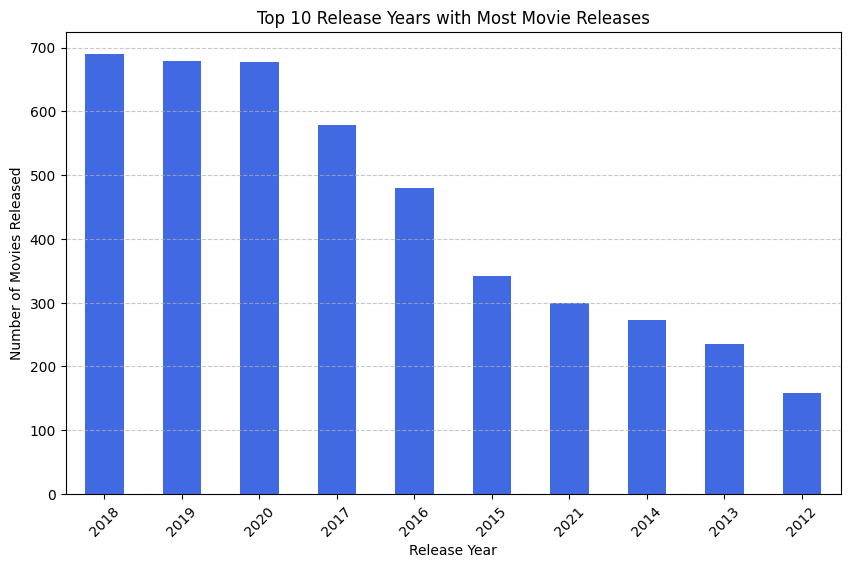

In [14]:
# Count and plot top 10 release years
top_10_years = df['YEAR'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_10_years.plot(kind='bar', color='royalblue')
plt.title('Top 10 Release Years with Most Movie Releases')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4. Top 10 most Voted movies

In [15]:
# Top 10 movies by number of votes
top_10_movies = df.nlargest(10, 'VOTES')
fig4 = px.bar(top_10_movies, x='MOVIES', y='VOTES', title='Top 10 Movies by Number of Votes')
fig4.show()

5. Top 10 most rated movies

In [16]:
# Top 10 movies by Rating
top_10_movies = df.nlargest(10, 'RATING')
fig4 = px.bar(top_10_movies, x='MOVIES', y='RATING', title='Top 10 Movies by Rating')
fig4.show()

6. Distribution of Genres

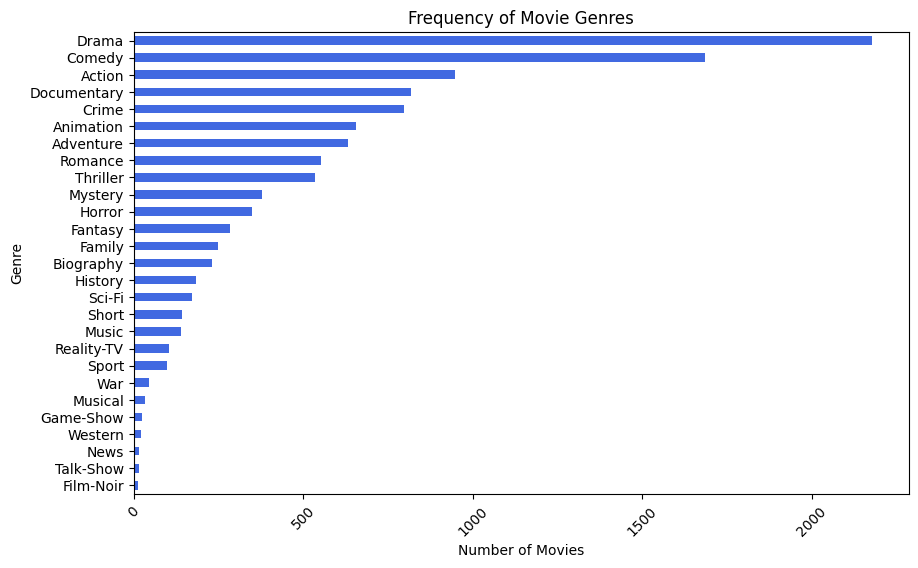

In [17]:

# Sum only the boolean values of the genre columns using the genre_columns list
genre_counts = df[genre_columns].sum()

# Visualization
plt.figure(figsize=(10, 6))
genre_counts.sort_values().plot(kind='barh', color='royalblue')
plt.title('Frequency of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.show()

-Iterate through each genre column.
-Filter out the rows where the genre is `True`.
-Calculate the average number of votes for these rows.

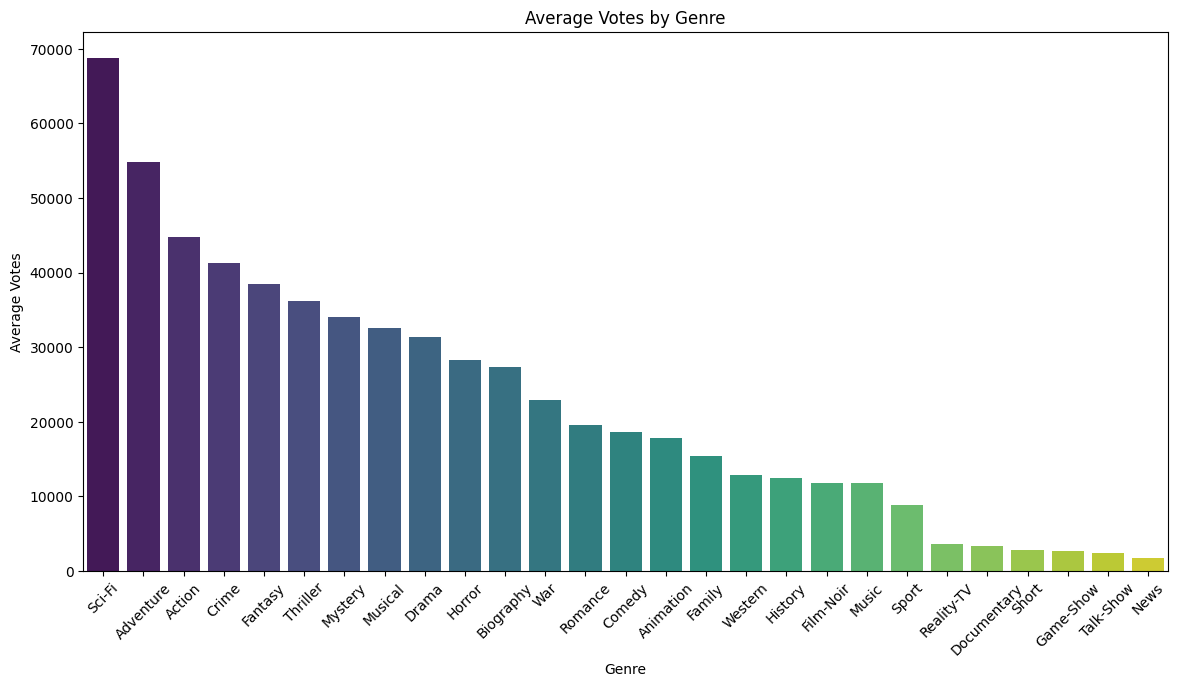

In [18]:
# Initialize a dictionary to store the average votes for each genre
average_votes = {}

# Iterate through each genre column
for genre in genre_columns:
    # Filter rows where the genre is True
    genre_votes = df[df[genre] == True]['VOTES']
    if not genre_votes.empty:
        # Calculate the average votes
        average_votes[genre] = genre_votes.mean()

# Convert the dictionary to a DataFrame for easier plotting
average_votes_df = pd.DataFrame(list(average_votes.items()), columns=['Genre', 'Average Votes'])

# Sort the DataFrame by Average Votes
average_votes_df = average_votes_df.sort_values(by='Average Votes', ascending=False)

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='Genre', y='Average Votes', data=average_votes_df, palette='viridis', hue='Genre', legend=False)
plt.title('Average Votes by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Votes')
plt.xticks(rotation=45)
plt.show()

<ipython-input-19-8b117ce62031>:6: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '12522.426229508197' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



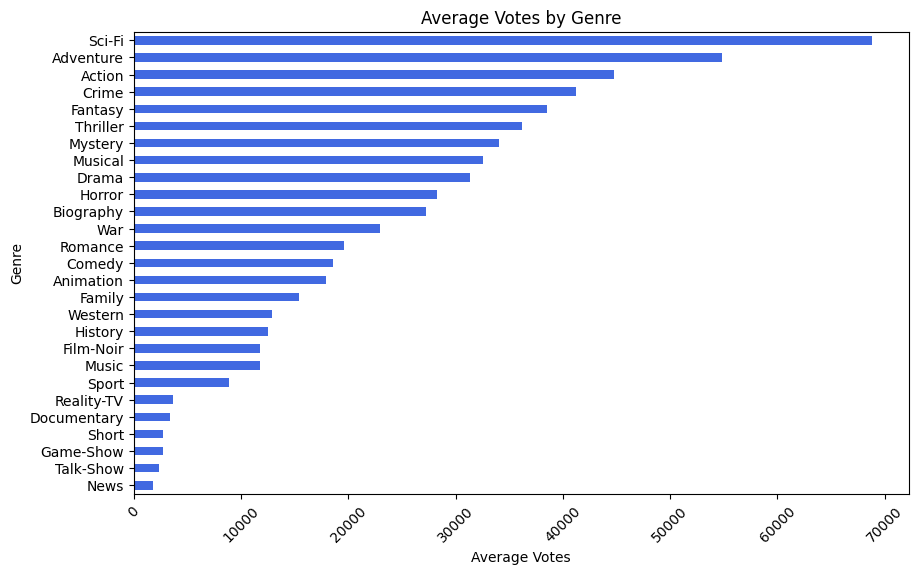

In [19]:

# Initialize a Series to hold total votes for each genre
total_votes_by_genre = pd.Series(0, index=genre_columns)

# Calculate total votes for each genre
for genre in genre_columns:
    total_votes_by_genre[genre] = df[df[genre]]['VOTES'].mean()

# Visualization
plt.figure(figsize=(10, 6))
total_votes_by_genre.sort_values().plot(kind='barh', color='royalblue')
plt.title('Average Votes by Genre')
plt.xlabel('Average Votes')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.show()

-Iterate through each genre column.
-Filter out the rows where the genre is `True`.
-Calculate the average rating for these rows.

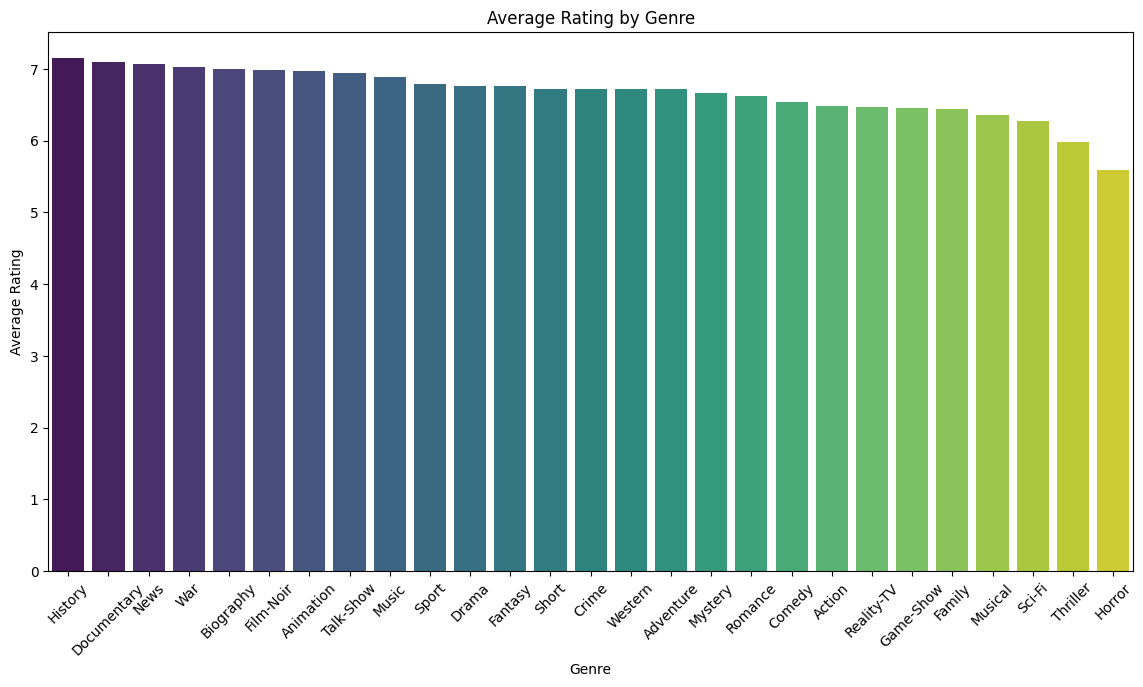

In [20]:

# Initialize a dictionary to store the average ratings for each genre
average_ratings = {}

# Iterate through each genre column
for genre in genre_columns:
    # Filter rows where the genre is True
    genre_ratings = df[df[genre] == True]['RATING']
    if not genre_ratings.empty:
        # Calculate the average rating
        average_ratings[genre] = genre_ratings.mean()

# Convert the dictionary to a DataFrame for easier plotting
average_ratings_df = pd.DataFrame(list(average_ratings.items()), columns=['Genre', 'Average Rating'])

# Sort the DataFrame by Average Rating
average_ratings_df = average_ratings_df.sort_values(by='Average Rating', ascending=False)

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='Genre', y='Average Rating', data=average_ratings_df, palette='viridis', hue='Genre', legend=False)
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-b2cdfc415986>:10: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7.1546448087431695' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



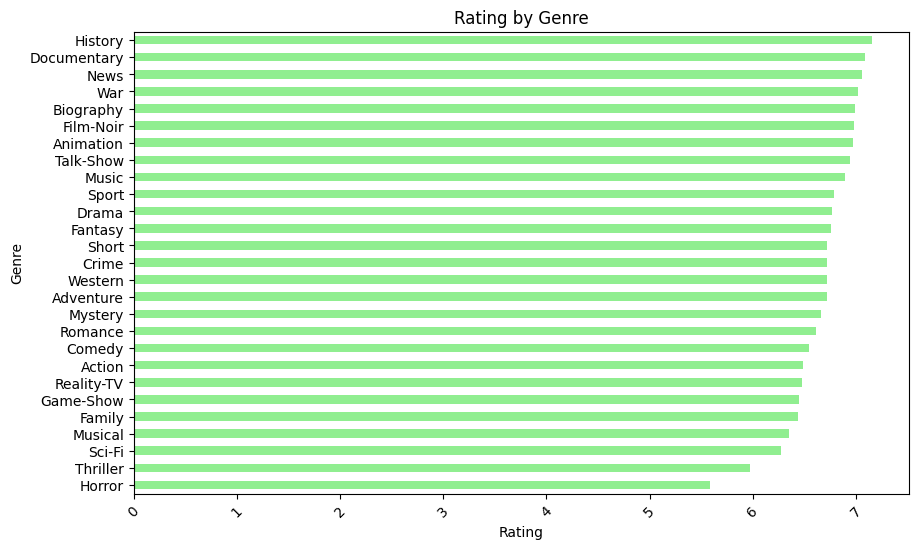

In [21]:

# Initialize a Series to hold average ratings for each genre
rating_by_genre = pd.Series(0, index=genre_columns)

# Calculate ratings for each genre
for genre in genre_columns:
    # Filter the movies belonging to the genre
    genre_movies = df[df[genre]]
    # Calculate the rating for the genre
    if not genre_movies.empty:
        rating_by_genre[genre] = genre_movies['RATING'].mean()
    else:
        rating_by_genre[genre] = 0  # Handle case where there are no movies in the genre

# Visualization
plt.figure(figsize=(10, 6))
rating_by_genre.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Rating by Genre')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.show()

Save cleaned dataset...

In [22]:
# save the cleaned dataframe
df.to_csv('movies_1.csv', index=False)